In [1]:
from google.colab import files
uploaded = files.upload()


Saving erp_pricing_data.csv to erp_pricing_data.csv


In [2]:
# Import core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style='whitegrid')

# Load the dataset (assuming it's already uploaded)
df = pd.read_csv('erp_pricing_data.csv')

# Preview the data
df.head()


,Project_ID,Duration_Weeks,Modules_Implemented,Team_Size,Client_Industry,Region,Complexity_Score,Price_Quoted
0,P0001,16.0,3,3,Finance,India,4.42,11600.0
1,P0002,13.0,3,7,Construction,India,6.34,17000.0
2,P0003,17.0,4,2,Retail,Europe,3.70,14600.0
3,P0004,22.0,4,8,Construction,Middle East,6.04,18500.0
4,P0005,13.0,6,8,Retail,Europe,6.88,20100.0


In [3]:
# Dataset shape
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

# Data types
print("\nData types:\n", df.dtypes)

# Missing values
print("\nMissing values:\n", df.isnull().sum())

# Summary stats
df.describe()


Number of rows: 500
Number of columns: 8

Data types:
 Project_ID              object
Duration_Weeks         float64
Modules_Implemented      int64
Team_Size                int64
Client_Industry         object
Region                  object
Complexity_Score       float64
Price_Quoted           float64
dtype: object

Missing values:
 Project_ID             0
Duration_Weeks         0
Modules_Implemented    0
Team_Size              0
Client_Industry        0
Region                 0
Complexity_Score       0
Price_Quoted           0
dtype: int64


,Duration_Weeks,Modules_Implemented,Team_Size,Complexity_Score,Price_Quoted
count,500.000000,500.000000,500.00000,500.000000,500.000000
mean,14.046000,3.966000,5.44400,5.533940,15862.400000
std,4.860363,1.422988,2.30597,1.736214,3484.282809
min,4.000000,2.000000,2.00000,1.000000,6400.000000
25%,10.750000,3.000000,3.00000,4.365000,13600.000000
50%,14.000000,4.000000,5.00000,5.505000,15800.000000
75%,17.000000,5.000000,7.00000,6.712500,18200.000000
max,33.000000,6.000000,9.00000,10.000000,24900.000000


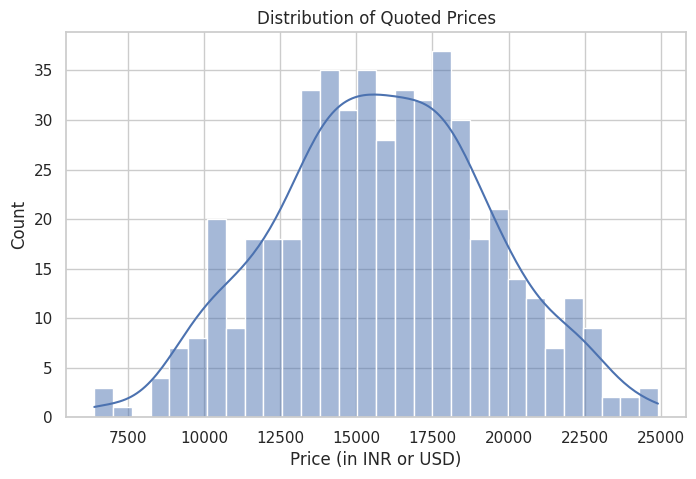

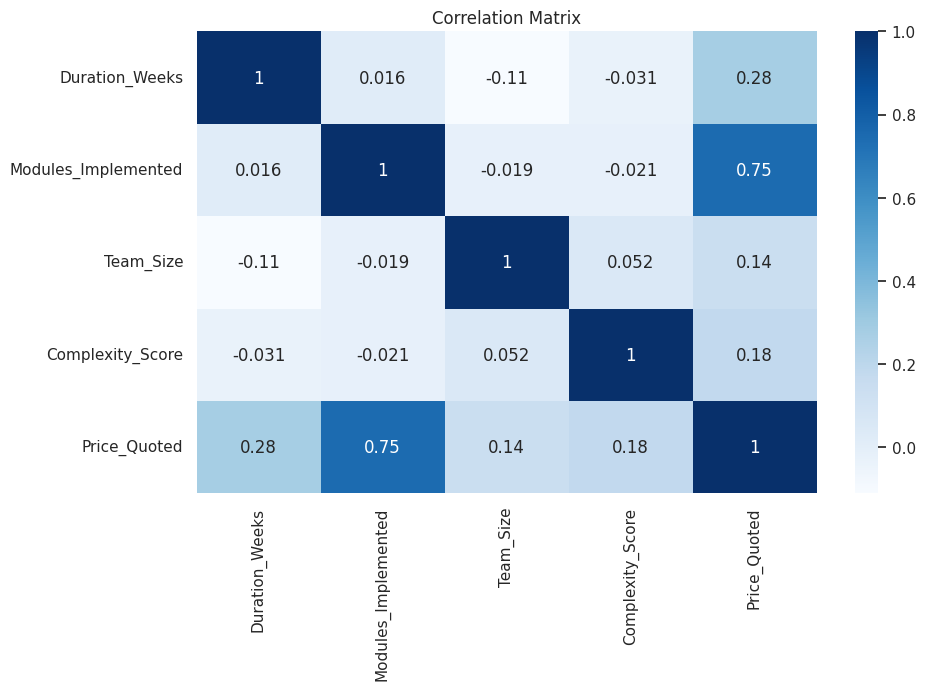

In [4]:
# Distribution of quoted prices
plt.figure(figsize=(8, 5))
sns.histplot(df['Price_Quoted'], bins=30, kde=True)
plt.title("Distribution of Quoted Prices")
plt.xlabel("Price (in INR or USD)")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')
plt.title("Correlation Matrix")
plt.show()


In [5]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['Client_Industry', 'Region'], drop_first=True)

# Check the result
df_encoded.head()


,Project_ID,Duration_Weeks,Modules_Implemented,Team_Size,Complexity_Score,Price_Quoted,Client_Industry_Finance,Client_Industry_Healthcare,Client_Industry_IT Services,Client_Industry_Logistics,Client_Industry_Manufacturing,Client_Industry_Retail,Region_Europe,Region_India,Region_Middle East,Region_USA
0,P0001,16.0,3,3,4.42,11600.0,True,False,False,False,False,False,False,True,False,False
1,P0002,13.0,3,7,6.34,17000.0,False,False,False,False,False,False,False,True,False,False
2,P0003,17.0,4,2,3.70,14600.0,False,False,False,False,False,True,True,False,False,False
3,P0004,22.0,4,8,6.04,18500.0,False,False,False,False,False,False,False,False,True,False
4,P0005,13.0,6,8,6.88,20100.0,False,False,False,False,False,True,True,False,False,False


In [6]:
# Define target and features
X = df_encoded.drop(['Project_ID', 'Price_Quoted'], axis=1)
y = df_encoded['Price_Quoted']


In [7]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 1770.29
RMSE: 2199.065499251898
R² Score: 0.6187474992541913


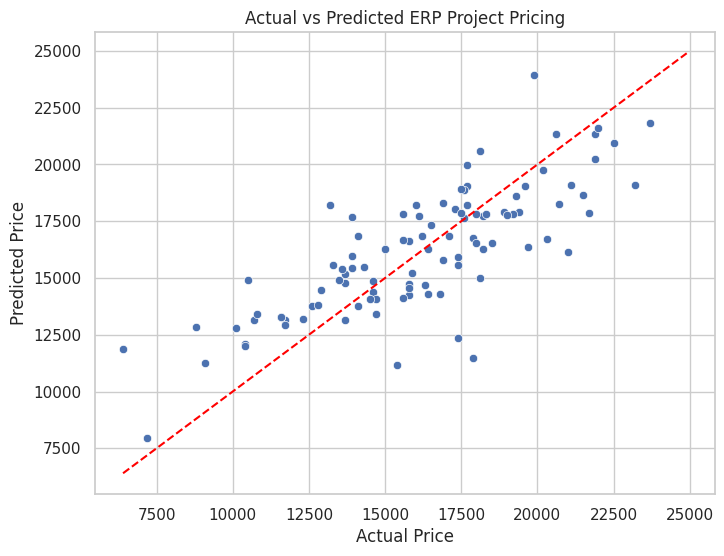

In [9]:
# Plot predicted vs actual
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted ERP Project Pricing")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.show()


In [10]:
import xgboost as xgb

# Initialize and train
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("XGBoost RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("XGBoost R² Score:", r2_score(y_test, y_pred_xgb))


XGBoost MAE: 1761.0252734375
XGBoost RMSE: 2263.0583153988146
XGBoost R² Score: 0.5962357516699714


In [11]:
from sklearn.linear_model import Lasso

# Initialize and train
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Predict and evaluate
y_pred_lasso = lasso.predict(X_test)

print("Lasso MAE:", mean_absolute_error(y_test, y_pred_lasso))
print("Lasso RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print("Lasso R² Score:", r2_score(y_test, y_pred_lasso))


Lasso MAE: 1579.9404192469426
Lasso RMSE: 1986.7606178785172
Lasso R² Score: 0.6888086932016115


In [30]:
import streamlit as st
import pandas as pd
import joblib

st.title("ERP Project Pricing Suggestion")

st.write("Upload your project data CSV")

uploaded_file = st.file_uploader("Choose a file")
if uploaded_file:
    data = pd.read_csv(uploaded_file)
    st.write(data.head())

    # Load model (assumed pre-trained and saved as model.joblib)
    model = joblib.load('rf_model.joblib')

    # Prepare features as needed and predict price suggestion
    prediction = model.predict(data)
    st.write("Predicted Price Suggestions:")
    st.write(prediction)


2025-10-21 18:46:09.135 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-21 18:46:09.310 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-10-21 18:46:09.312 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-21 18:46:09.315 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-21 18:46:09.318 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-21 18:46:09.321 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-21 18:46:09.323 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-21 18:46:09.325 Thread 'MainThread': mi

In [31]:
!pip install streamlit pyngrok


In [36]:
# 1. Install pyngrok if you haven't already
!pip install pyngrok

# 2. Authenticate ngrok with your token
!ngrok authtoken 34CIaIak6EJmGgYyY4rWTCUXkVn_22a6UZJMioiz2oG2T6e83

# 3. Start your Streamlit app in the background (adjust your script path if needed)
!streamlit run your_app.py &

# 4. Import ngrok and open a tunnel to the Streamlit port (default 8501)
from pyngrok import ngrok

public_url = ngrok.connect(8501)
print(f"Streamlit app is live at: {public_url}")


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: your_app.py
Streamlit app is live at: NgrokTunnel: "https://unmentioned-sherrill-unprovocative.ngrok-free.dev" -> "http://localhost:8501"


In [39]:
from pyngrok import ngrok

public_url = ngrok.connect(8501)
print(f"Streamlit app is live at: {public_url}")


Streamlit app is live at: NgrokTunnel: "https://unmentioned-sherrill-unprovocative.ngrok-free.dev" -> "http://localhost:8501"


In [49]:
# === (1) Install required packages ===
!pip install pymc arviz streamlit pyngrok --quiet

# === (2) Imports ===
import numpy as np
import pandas as pd
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pyngrok import ngrok
import os

# === (3) Simulate Dataset ===
np.random.seed(42)
n = 500
industries = ['Manufacturing', 'Retail', 'Logistics', 'Finance', 'Healthcare', 'Construction', 'IT Services']
regions = ['India', 'USA', 'Europe', 'Middle East', 'Africa']

df = pd.DataFrame({
    'Project_ID': [f'P{i:04}' for i in range(1, n+1)],
    'Duration_Weeks': np.random.normal(loc=14, scale=5, size=n).clip(4, 40).round(2),
    'Modules_Implemented': np.random.randint(2, 7, size=n),
    'Team_Size': np.random.randint(2, 10, size=n),
    'Client_Industry': np.random.choice(industries, size=n),
    'Region': np.random.choice(regions, size=n),
    'Complexity_Score': np.random.normal(loc=5.5, scale=1.8, size=n).clip(1,10).round(2)
})

base_price = (
    1500
    + df['Modules_Implemented'] * 1800
    + df['Duration_Weeks'] * 200
    + df['Team_Size'] * 300
    + df['Complexity_Score'] * 500
)
noise = np.random.normal(loc=0, scale=2000, size=n)
df['Price_Quoted'] = (base_price + noise).round(-2).clip(5000)

# === (4) Preprocessing ===
X = df.drop(columns=['Project_ID', 'Price_Quoted'])
y = df['Price_Quoted']
X = pd.get_dummies(X, columns=['Client_Industry', 'Region'], drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_np = X_train.astype(float).values
X_test_np = X_test.astype(float).values
y_train_np = y_train.astype(float).values
y_test_np = y_test.astype(float).values

# === (5) Bayesian Regression (PyMC) ===
with pm.Model() as model:
    coefs = pm.Normal('coefs', mu=0, sigma=10, shape=X_train_np.shape[1])
    intercept = pm.Normal('intercept', mu=0, sigma=10)
    sigma = pm.HalfNormal('sigma', sigma=1)
    mu = intercept + pm.math.dot(X_train_np, coefs)
    y_obs = pm.Normal('y_obs', mu=mu, sigma=sigma, observed=y_train_np)
    trace = pm.sample(1000, tune=1000, target_accept=0.9, cores=1)

# === (6) Predict on Test Set ===
coefs_mean = trace.posterior['coefs'].mean(dim=["chain", "draw"]).values
intercept_mean = trace.posterior['intercept'].mean(dim=["chain", "draw"]).values
sigma_mean = trace.posterior['sigma'].mean(dim=["chain", "draw"]).values
mu_test = intercept_mean + np.dot(X_test_np, coefs_mean)
y_pred_samples = np.random.normal(loc=mu_test, scale=sigma_mean, size=(1000, len(mu_test)))
y_pred_mean = y_pred_samples.mean(axis=0)
y_pred_std = y_pred_samples.std(axis=0)

# === (7) Save for Streamlit App ===
np.save('y_pred_mean.npy', y_pred_mean)
np.save('y_pred_std.npy', y_pred_std)
np.save('y_test.npy', y_test_np)
az.to_netcdf(trace, 'trace.nc')

# === (8) Write Streamlit App Code ===
app_code = """
import streamlit as st
import numpy as np
import matplotlib.pyplot as plt
import arviz as az

st.title("Bayesian ERP Price Prediction")
y_pred_mean = np.load('y_pred_mean.npy')
y_pred_std = np.load('y_pred_std.npy')
y_test = np.load('y_test.npy')
trace = az.from_netcdf('trace.nc')

st.write("### Predicted vs Actual (with Uncertainty)")
fig, ax = plt.subplots(figsize=(10, 6))
ax.errorbar(range(len(y_pred_mean)), y_pred_mean, yerr=y_pred_std, fmt='o', label='Predicted ±1 std')
ax.scatter(range(len(y_test)), y_test, color='red', alpha=0.5, label='Actual')
ax.set_xlabel("Test Data Index")
ax.set_ylabel("Price Quoted")
ax.legend()
st.pyplot(fig)

st.write("### Posterior Summary")
st.write(az.summary(trace).round(2))
"""

with open("app.py", "w") as f:
    f.write(app_code)

# === (9) Launch Streamlit App using ngrok ===
NGROK_AUTH_TOKEN = "34CIaIak6EJmGgYyY4rWTCUXkVn_22a6UZJMioiz2oG2T6e83"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Correct way to connect with full address
public_url = ngrok.connect("http://localhost:8501")
print("✅ Streamlit app is live at:", public_url)

# Run Streamlit (non-blocking)
!streamlit run app.py &>/dev/null &


Output()

✅ Streamlit app is live at: NgrokTunnel: "https://unmentioned-sherrill-unprovocative.ngrok-free.dev" -> "http://localhost:8501"
